### Graph 5 Looping Graph

In [11]:
from typing import TypedDict,List
import random 
from langgraph.graph import StateGraph,START,END

In [ ]:
class AgentState(TypedDict):
    name: str
    nums: List[int]
    counter: int
    maxlen: int

In [19]:
def initial(state:AgentState)->AgentState:
    """"""

    state["name"] = f"hello , {state["name"]}"
    state["counter"]=0
    return state

def set_random(state:AgentState)->AgentState:
    """"""

    state["nums"].append(random.randint(0,100))
    state["counter"]+=1
    return state

def rout(state:AgentState)->AgentState:
    """"""
    if state["counter"]<state["maxlen"]:
        print(f"LOOP {state["counter"]}...")
        return "LOOP"
    else :
        return "EXIT"

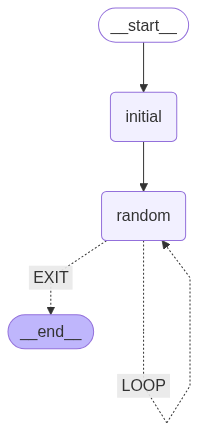

In [20]:
graph = StateGraph(AgentState)
graph.add_node("initial",initial)
graph.add_node("random",set_random)

graph.add_edge(START,"initial")
graph.add_edge("initial","random")

graph.add_conditional_edges(
   "random",
    rout,
    {
        "LOOP":"random",
        "EXIT": END
    }
)

app = graph.compile()
app

In [22]:
test_state = AgentState(
    name = "LiHao",
    nums=[],
    counter=-10,
    maxlen=5
)
res = app.invoke(test_state)
res

LOOP 1...
LOOP 2...
LOOP 3...
LOOP 4...


{'name': 'hello , LiHao',
 'nums': [89, 0, 80, 40, 88],
 'counter': 5,
 'maxlen': 5}

In [32]:
res

{'name': 'hello , LiHao',
 'nums': [89, 0, 80, 40, 88],
 'counter': 5,
 'maxlen': 5}